<a href="https://colab.research.google.com/github/Pourixa/FraudulentPayments/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 178M/178M [00:10<00:00, 18.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jainilcoder/online-payment-fraud-detection/versions/1


In [2]:
import pandas as pd

df = pd.read_csv(path + "/onlinefraud.csv").drop("isFlaggedFraud",axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
Y = df["isFraud"]
X = pd.get_dummies(df.drop(["isFraud","nameOrig","nameDest"],axis=1),dtype=int)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [5]:
modelLR = LogisticRegression()
scoresLR = cross_validate(modelLR,X_train,y_train,cv=5)

In [6]:
scoresLR

{'fit_time': array([10.05116963, 12.63654137, 12.75932455, 12.23280168, 11.35096359]),
 'score_time': array([0.05287147, 0.04744577, 0.04995418, 0.0472424 , 0.04816747]),
 'test_score': array([0.99914835, 0.99922693, 0.99918469, 0.99914049, 0.99919353])}

In [7]:
modelLR.fit(X_train,y_train)

LogisticRegression()

In [8]:
modelLR.score(X_test,y_test)

0.9991685814963018

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import EarlyStopping

In [10]:
X_train , _x , y_train , _y = train_test_split(X,Y,test_size=0.4)
x_val , x_test , y_val , y_test = train_test_split(_x,_y,test_size=0.5)

In [11]:
modelNN = Sequential(
    [
        Input(shape=(X_train.shape[1],)),
        Dense(11,activation="relu",),
        Dense(1,activation="sigmoid")

    ]
)
es = EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)
modelNN.compile(loss=BinaryCrossentropy(),optimizer=Adam(),metrics=["accuracy"])

In [12]:
# modelNN.fit(X_train,y_train,epochs=15,validation_data=(x_val,y_val),callbacks=[es])

Epoch 1/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 349s 3ms/step - accuracy: 0.9986 - loss: 0.0119 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 2/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 348s 3ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 3/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 347s 3ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 4/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 348s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 5/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 347s 3ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 6/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 350s 3ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 7/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 349s 3ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 36

In [13]:
# modelNN.save("fraudModel.keras")

In [ ]:
modelNN = load_model("fraudModel.keras")

In [14]:
modelNN.evaluate(x_test,y_test)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 91s 2ms/step - accuracy: 0.9996 - loss: 0.0026


[0.0026712827384471893, 0.9995661973953247]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

modelDT=DecisionTreeClassifier()

In [ ]:
scoresDT = cross_validate(modelDT,X_train,y_train,cv=5)

In [18]:
scoresDT

{'fit_time': array([66.10070944, 53.8838141 , 50.31672454, 52.90887308, 47.24840951]),
 'score_time': array([0.10740232, 0.09868741, 0.08900928, 0.09173894, 0.08692217]),
 'test_score': array([0.9997112 , 0.99970826, 0.99969942, 0.99966209, 0.99967682])}

In [24]:
modelDT.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
modelDT.score(X_test,y_test)

0.9996919508001421

[Text(0.9309401956511371, 0.9848484848484849, 'x[0] <= 3.338\ngini = 0.003\nsamples = 5090096\nvalue = [5083531, 6565]'),
 Text(0.9300065433199238, 0.9545454545454546, 'x[1] <= 3.933\ngini = 0.002\nsamples = 5089863\nvalue = [5083531, 6332]'),
 Text(0.9304733694855305, 0.9696969696969697, 'True  '),
 Text(0.8628140436334872, 0.9242424242424242, 'x[1] <= 0.725\ngini = 0.002\nsamples = 5066225\nvalue = [5060962, 5263]'),
 Text(0.754177424957352, 0.8939393939393939, 'x[1] <= -0.298\ngini = 0.001\nsamples = 4897557\nvalue = [4893992, 3565]'),
 Text(0.7532437726261388, 0.8636363636363636, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.7551110772885651, 0.8636363636363636, 'x[10] <= 1.503\ngini = 0.001\nsamples = 4897545\nvalue = [4893992, 3553]'),
 Text(0.5813985565144588, 0.8333333333333334, 'x[0] <= 1.16\ngini = 0.001\nsamples = 4646504\nvalue = [4644697, 1807]'),
 Text(0.3634676285800643, 0.803030303030303, 'x[7] <= 0.311\ngini = 0.0\nsamples = 4375885\nvalue = [4374799, 1086]'),


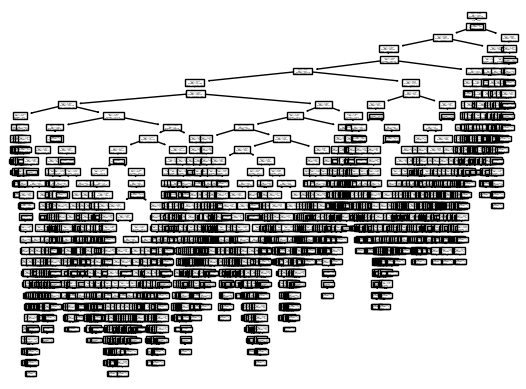

In [26]:
plot_tree(modelDT)